In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

Requirement already up-to-date: ipykernel in /usr/local/lib/python3.6/dist-packages (5.3.0)


In [ ]:
%autosave 0

import warnings; warnings.simplefilter('ignore')

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import umap
import umap.plot

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import manifold
from sklearn.utils import check_random_state

import holoviews
import datashader
import bokeh
from bokeh.plotting import show, save, output_notebook, output_file
from bokeh.resources import INLINE


plt.rcParams["figure.figsize"] = (20,10)

Autosave disabled


In [ ]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

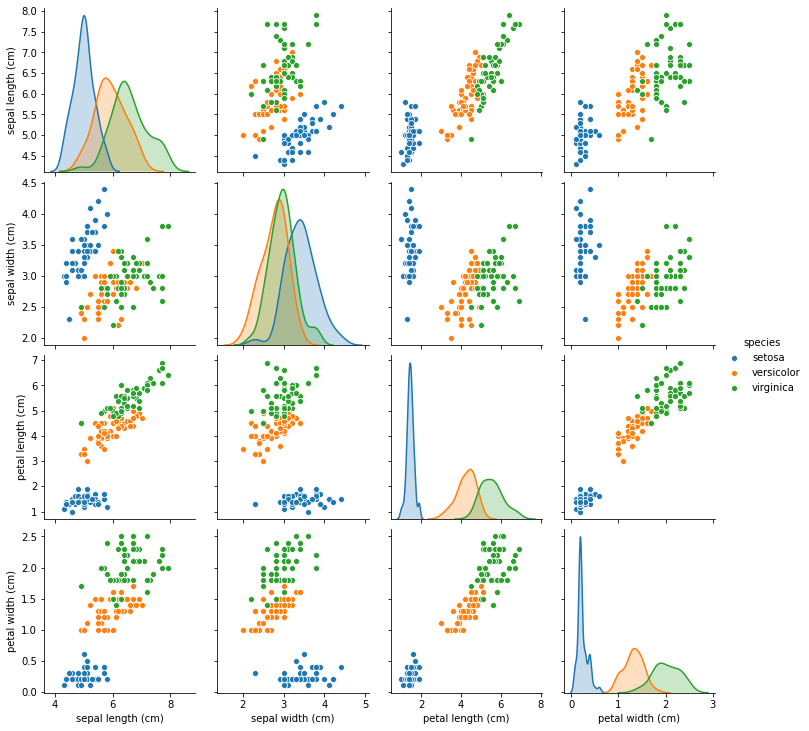

In [ ]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
sns.pairplot(iris_df, hue='species');

In [ ]:
embedding = umap.UMAP(n_components=2, metric='hellinger', random_state=42).fit(iris.data)

category_labels = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
hover_df = pd.DataFrame(category_labels, columns=['category'])

f = umap.plot.interactive(embedding, labels=category_labels,
                              hover_data=hover_df, point_size=5,
                              color_key_cmap='Accent', background='darkblue')
output_notebook(resources=INLINE)
umap.plot.show(f)

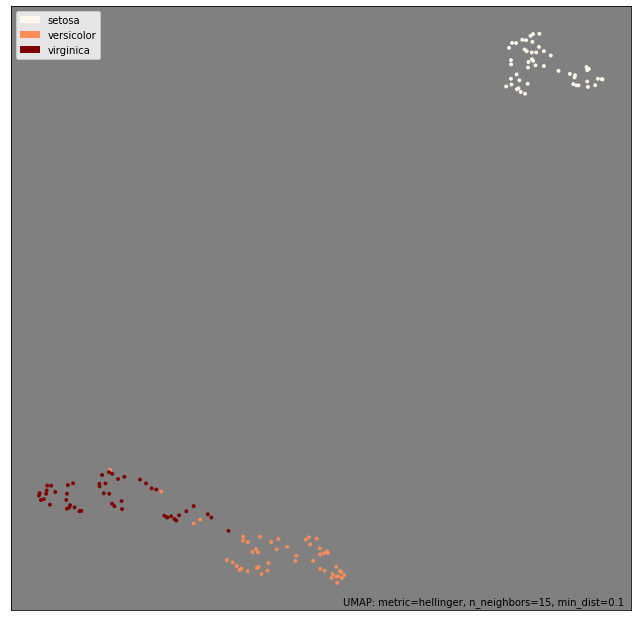

In [ ]:
umap.plot.points(embedding, labels=category_labels, color_key_cmap='OrRd', background='gray')

In [ ]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(iris.data)
embedding.shape

(150, 2)

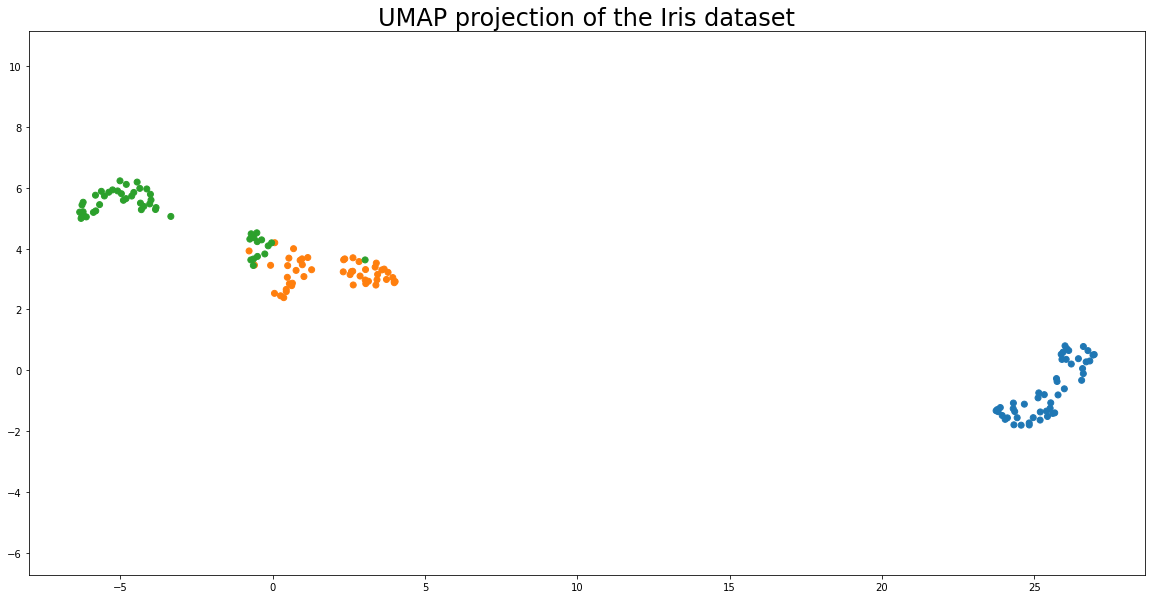

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in iris.target])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);

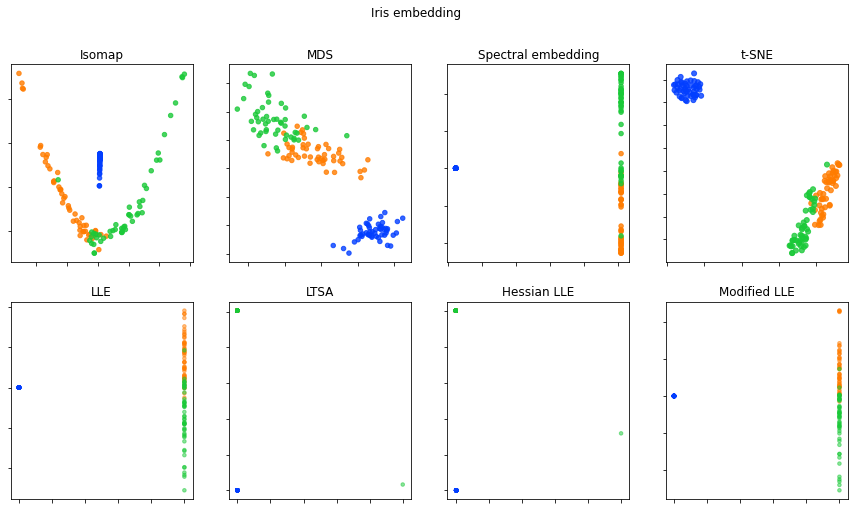

In [ ]:
n_neighbors = 10

#Isomap:
trans_data = manifold.Isomap(n_neighbors, n_components=2)\
    .fit_transform(iris.data).T

# Plot our embedding.
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Iris embedding")

ax = fig.add_subplot(241)
plt.title("Isomap")
plt.scatter(trans_data[0], trans_data[1], cmap=plt.cm.rainbow, marker='.', s=80, alpha=0.8,
            c=[sns.color_palette("bright")[x] for x in iris.target])
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

#MDS:
mds = manifold.MDS(2, max_iter=100, n_init=1)
trans_data = mds.fit_transform(iris.data).T

# Plot our embedding.

ax = fig.add_subplot(242)
plt.title("MDS")
plt.scatter(trans_data[0], trans_data[1], cmap=plt.cm.rainbow, marker='.', s=80, alpha=0.8,
            c=[sns.color_palette("bright")[x] for x in iris.target])
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

#Spectral embedding:
se = manifold.SpectralEmbedding(n_components=2,
                                n_neighbors=n_neighbors)
trans_data = se.fit_transform(iris.data).T

# Plot our embedding.

ax = fig.add_subplot(243)
plt.title("Spectral embedding")
plt.scatter(trans_data[0], trans_data[1], cmap=plt.cm.rainbow, marker='.', s=80, alpha=0.8,
            c=[sns.color_palette('bright')[x] for x in iris.target])
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Perform t-distributed stochastic neighbor embedding.

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
trans_data = tsne.fit_transform(iris.data).T
ax = fig.add_subplot(244)
plt.title("t-SNE")
plt.scatter(trans_data[0], trans_data[1], cmap=plt.cm.rainbow, marker='.', s=100, alpha=0.8,
            c=[sns.color_palette("bright")[x] for x in iris.target])
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


# Perform Locally Linear Embedding Manifold learning
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    trans_data = manifold\
        .LocallyLinearEmbedding(n_neighbors, 2,
                                method=method).fit_transform(iris.data).T
    ax = fig.add_subplot(245 + i)
    plt.scatter(trans_data[0], trans_data[1], c=[sns.color_palette("bright")[x] for x in iris.target],
                marker='.', s=50, alpha=0.5)
    plt.title(labels[i])
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

plt.show()